### 04. 카운트 기반의 단어 표현(Count based word Representation)
    - 텍스트를 표현 하는 방법 중에서 카운트 기반의 텍스트 표현 방법인 DTM(Document Term Matrix)과 TF-IDF(Term Frequency-Inverse Document Frequency)에 대해 다룬다.
    - 텍스트를 수치화하면, 통계적인 접근 방법을 통해 여러 문서로 이루어진 텍스트 데이터가 있을 때 어떤 단위가 특정 문서 내에서 얼마나 중요한 것인지를 나타내고, 문서의 핵심 추출, 검색 엔진에서 검색 결과의 순위 결정, 문서들 간의 유사도를 구하는 등의 용도로 사용 가능하다.

#### BoW
    - 빈도수 기반 단어 표현 방법
    - 단어의 순서는 고려하지 않고 단어의 출현 빈도에만 집중하는 텍스트 데이터 수치화 표현 방법

In [1]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(doc):
    # 온점 제거 및 형태소 분석
    doc = doc.replace(".", "")
    tokenized_doc = okt.morphs(doc)
    
    word_to_index = {}
    bow = []
    
    for word in tokenized_doc:
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)
            #bow에 전부 기본값 1을 넣는다.
            bow.insert(len(word_to_index) - 1, 1)
        else:
            #재등장하는 단어의 인덱스
            index = word_to_index.get(word)
            #재등장하는 단어는 해당하는 인덱스의 위치에 +1
            bow[index] += 1
    return word_to_index, bow

In [2]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."

vocab, bow = build_bag_of_words(doc1)
print("vocabulary:", vocab)
print("bag of words vector:", bow)

vocabulary: {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


    - 한국어에서 불용어에 해당되는 조사들을 제거한다면, 더 정제된 BoW를 만들 수 있다.

In [3]:
doc2 = "소비자는 주로 소비하는 상품을 기준으로 물가 상승률을 느낀다."

vocab, bow = build_bag_of_words(doc2)
print("vocabulary:",vocab)
print("bag of words vector:", bow)

vocabulary: {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가': 9, '상': 10, '승률': 11, '느낀다': 12}
bag of words vector: [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]


In [4]:
doc3 = doc1 + ' ' + doc2

vocab, bow = build_bag_of_words(doc3)
print("vocabulary:", vocab)
print("bag of words vactor:", bow)

vocabulary: {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '물가': 17, '상': 18, '승률': 19, '느낀다': 20}
bag of words vactor: [1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]


In [5]:
#vocab이 존재하고 해당 vocab에 대한 BoW 구하기
def build_bag_of_words(vocab, doc):
    # 온점 제거 및 형태소 분석
    doc = doc.replace(".", "")
    tokenized_doc = okt.morphs(doc)
    
    word_to_index = vocab
    bow = [0 for i in range(len(vocab))]
    
    for word in tokenized_doc:
        index = word_to_index.get(word)
        bow[index] += 1
    return bow

In [6]:
#doc3의 Vocab에 대한 doc1의 BoW
bow = build_bag_of_words(vocab, doc1)
print("bag of words vactor:", bow)

bag of words vactor: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
#doc3의 Vocab에 대한 doc2의 BoW
bow = build_bag_of_words(vocab, doc2)
print("bag of words vactor:", bow)

bag of words vactor: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]


BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이므로 주로 어떤 단어가 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰인다. 

주로 분류 문제나 여러 문서 간의 유사도를 기준으로 어떤 성격의 문서인지를 판단하는 작업으로 쓰인다.

#### countVectorizer 클래스로 BoW 만들기
    - 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원한다. 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print("bag of words vector:", vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary:', vector.vocabulary_)

bag of words vector: [[1 1 2 1 2 1]]
vocabulary: {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


    - you, love는 두 번씩 언급되었으므로 각각 인덱스2와 인덱스4에서 2의 값을 가짐
    - 영어에서는 길이가 짧은 문자를 제거하는 것이 전처리 작업으로 고려됨
    - 주의할 점은 CountVectorzier은 단지 띄어쓰기만을 기준으로 단어를 자르는 토큰화를 진행하여 BoW를 만든다. 
   **=> 이는 영어는 문제 없지만 한국어에서는 BoW가 제대로 만들어지지않음**

#### 불용어를 제거한 BoW 만들기
    - 영어의 BoW를 만들기 위해 사용하는 CountVectorizer은 불용어를 지정하면, 제외하고 만들 수 있는 기능을 지원한다.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [10]:
# 사용자 지정 불용어
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print("bag of words vector:", vect.fit_transform(text).toarray())
print("vocabulary:", vect.vocabulary_)

bag of words vector: [[1 1 1 1 1]]
vocabulary: {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [11]:
# CountVectorizer 자체 지원 불용어
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")

print("bag of words vector:", vect.fit_transform(text).toarray())
print("vocabulary:", vect.vocabulary_)

bag of words vector: [[1 1 1]]
vocabulary: {'family': 0, 'important': 1, 'thing': 2}


In [12]:
# NLTK 지원 불용어
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)

print("bag of words vector:", vect.fit_transform(text).toarray())
print("vocabulary:", vect.vocabulary_)

bag of words vector: [[1 1 1 1]]
vocabulary: {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


----------

### 문서 단어 행렬(Document-Term Matrix, DTM)
    - 서로 다른 문서들의 BoW를 결합한 표현 문서 방법이다. 
    - 행과 열을 반대로 선택하면 TDM이라고 부르기도 한다.
    - 서로 다른 문서들을 비교할 수 있게 된다.

In [13]:
doc1 = "먹고 싶은 사과"
doc2 = "먹고 싶은 바나나"
doc3 = "길고 노란 바나나 바나나"
doc4 = "저는 과일이 좋아요"

In [14]:
all_doc = doc1 + " " + doc2 + " " + doc3 + " " + doc4

print("모든 단어 집합:", all_doc)

모든 단어 집합: 먹고 싶은 사과 먹고 싶은 바나나 길고 노란 바나나 바나나 저는 과일이 좋아요


**교재의 예제상에서 띄어쓰기 단위 토큰화를 수행하여 해당 토큰화를 진행**

In [15]:
import re

all_doc = set(re.split(" ", all_doc))
print("겹치는 단어가 없는 단어 집합:", all_doc)

겹치는 단어가 없는 단어 집합: {'먹고', '사과', '저는', '좋아요', '바나나', '싶은', '길고', '노란', '과일이'}


index를 달아줌

In [16]:
vocab = {word: index for index, word in enumerate(all_doc)}
vocab

{'먹고': 0,
 '사과': 1,
 '저는': 2,
 '좋아요': 3,
 '바나나': 4,
 '싶은': 5,
 '길고': 6,
 '노란': 7,
 '과일이': 8}

In [17]:
def DTM(vocab, doc):
    doc = doc.replace(".", "")
    tokenized_doc = re.split(" ", doc)
    
    vocab = vocab
    DTM = [0 for i in range(len(all_doc))]
    
    for i in tokenized_doc:
        index = vocab.get(i)
        DTM[index] += 1
    return DTM

In [18]:
print("문서 1의 DTM:", DTM(vocab, doc1))
print("문서 2의 DTM:", DTM(vocab, doc2))
print("문서 3의 DTM:", DTM(vocab, doc3))
print("문서 4의 DTM:", DTM(vocab, doc4))

문서 1의 DTM: [1, 1, 0, 0, 0, 1, 0, 0, 0]
문서 2의 DTM: [1, 0, 0, 0, 1, 1, 0, 0, 0]
문서 3의 DTM: [0, 0, 0, 0, 2, 0, 1, 1, 0]
문서 4의 DTM: [0, 0, 1, 1, 0, 0, 0, 0, 1]


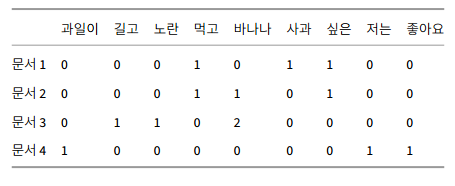
위의 이미지와는 단어의 순서가 달라 결과는 다르지만 해당 단어의 카운트를 보면 답이 일치하는 것을 확인 가능하다.

### TF-IDF
    - DTM 내에 각 단어들에 대해 중요도를 계산 할 수 있는 것이 TF-IDF이다.
    - TF-IDF를 사용하면 기존 DTM보다 많은 정보를 고려할 수 있다.
위의 DTM은 TF가 된다.

In [19]:
import math
import numpy as np

In [20]:
DTM = [DTM(vocab, doc1), DTM(vocab, doc2), DTM(vocab, doc3), DTM(vocab, doc4)]
print(DTM)

[[1, 1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 2, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0, 0, 0, 1]]


In [21]:
len(DTM)

4

In [22]:
DTM[0]

[1, 1, 0, 0, 0, 1, 0, 0, 0]

In [23]:
def TF_IDF(DTM):
    n = len(DTM)
    word_index = len(DTM[0])
    
    IDF = [0 for i in range(len(DTM[0]))]
    
    for i in range(n):
        for j in range(word_index):
            if DTM[i][j] != 0:
                IDF[j] += 1
    for i in range(word_index):
        DF = IDF[i] + 1
        IDF[i] = np.log(n/(DF)) 
    return IDF

In [24]:
TF_IDF(DTM)

[0.28768207245178085,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.28768207245178085,
 0.28768207245178085,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453]

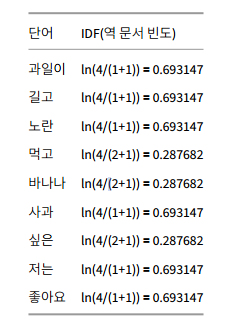
    
    - '바나나', '길고', '노란', '저는', '먹고', '좋아요', '과일이', '사과', '싶은'
    - TF-IDF를 위의 글자 순으로 표와 비교를 해보면 일치하는 것을 확인 할 수 있다.
    - 이제 내가 만든 TF-IDF를 원래 문서 값들에 대한 벡터값에 넣어준다.

In [25]:
def TF_IDF(DTM):
    n = len(DTM)
    word_index = len(DTM[0])
    
    IDF = [0 for i in range(len(DTM[0]))]
    
    # 문서에 해당된 언급 갯수와 상관 없이 문서 개수만 추가
    for i in range(n):
        for j in range(word_index):
            if DTM[i][j] != 0:
                IDF[j] += 1
    
    # IDF 값을 계산
    for i in range(word_index):
        DF = IDF[i] + 1
        IDF[i] = np.log(n/(DF))
        
    for i in range(n):
        for j in range(word_index):
            if DTM[i][j] != 0:
                DTM[i][j] = IDF[j]
    return IDF, DTM

In [26]:
idf, dtm = TF_IDF(DTM)
print("각 단어에 대한 IDF:", idf)
print("\ndoc1의 TF-IDF:", dtm[0])
print("doc2의 TF-IDF:", dtm[1])
print("doc3의 TF-IDF:", dtm[2])
print("doc4의 TF-IDF:", dtm[3])

각 단어에 대한 IDF: [0.28768207245178085, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0.28768207245178085, 0.28768207245178085, 0.6931471805599453, 0.6931471805599453, 0.6931471805599453]

doc1의 TF-IDF: [0.28768207245178085, 0.6931471805599453, 0, 0, 0, 0.28768207245178085, 0, 0, 0]
doc2의 TF-IDF: [0.28768207245178085, 0, 0, 0, 0.28768207245178085, 0.28768207245178085, 0, 0, 0]
doc3의 TF-IDF: [0, 0, 0, 0, 0.28768207245178085, 0, 0.6931471805599453, 0.6931471805599453, 0]
doc4의 TF-IDF: [0, 0, 0.6931471805599453, 0.6931471805599453, 0, 0, 0, 0, 0.6931471805599453]


**여기까지 TF-IDF는 교재상의 코드가 아니라 직접 실습을 해본 결과이다**
    
    - 여기부터는 교재상의 코드로 실습을 진행해보겠다.

#### 파이썬으로 TF-IDF 직접 구현하기

In [27]:
import pandas as pd
from math import log

docs = [
    "먹고 싶은 사과",
    "먹고 싶은 바나나",
    "길고 노란 바나나 바나나",
    "저는 과일이 좋아요"
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [28]:
# 총 문서의 수
N = len(docs)

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d) * idf(t)

In [29]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
    result.append([])
    d = docs[i]
    
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t,d))
        
tf_ = pd.DataFrame(result, columns=vocab)

In [30]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [31]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
    
idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [32]:
result = []

for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t, d))
        
tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


    - TF-IDF 구현을 제공하는 많은 머신러닝 패키지들은 패키지마다 조금씩 상이하지만, 위에서 배운 식과 다른 조정된 식을 사용한다. 
    - 기본적인 식을 바탕으로 한 구현에는 문제점이 존재한다. 
    - if 문서의 수가 4개, df(t)의 값이 3일 경우 로그항의 분모와 분자가 같아진다. 이는 log의 진수값이 1이 되면서 idf(d,f)의 값이 0이 됨을 의미한다. 
    - 이와 같이 IDF값이 0이 된다면 가중치의 역할을 수행하지 못한다.

#### 사이킷런을 이용한 DTM과 TF-IDF 실습

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "you know I want your love",
    "I like you",
    "what should I do",
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스를 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


    - 사이킷런의 TF-IDF 수식은 기존의 수식과는 조금 다르니 확인 필요